# Convection diffusion 1D stationnaire

## Description du problème

![](Images/convection_diffusion_1D_2.png)

On considère ici le problème stationnaire de convection-diffusion de la quantité $\phi$ en 1D $(x\in\left[0,L\right])$ , régit par l'équation aux dérivées partielles suivante:

\begin{equation}
  \frac{\partial}{\partial x} (\rho u \phi) = \frac{\partial}{\partial x} (\Gamma
  \frac{\partial \phi}{\partial x})
\end{equation}

où :
* $\Gamma$ est le coéfficient de diffusion (dynamique) supposé constant ici;
* $u$ est la vitesse de convection qui est ici supposée connue et constante.

On supposera que les valeurs frontières de $\phi$ en $x=0$ et $x=L$ sont connues avec :

* $\phi\left(0\right)=\phi_{A}$
* $\phi\left(L\right)=\phi_{B}$

**1. Traiter numériquement le problème avec des opérateurs d'interpolation linéaires et des différences centrées au second ordre**

**2. Comparer la solution numérique à la solution analytique**

Celle-ci est donnée par :

$$\frac{\phi-\phi_{A}}{\phi_{B}-\phi_{A}}=\frac{\exp\left(\frac{P_{e}x}{L}\right)-1}{\exp\left(P_{e}\right)-1}$$

où $P_{e}$ est le nombre de Péclet (il représente le rapport entre les forces de convection et de diffusion) défini par la relation :

$$P_{e}=\frac{\rho uL}{\Gamma}$$

**Données :**  $L = 1.0 m$, $\rho = 1.0 kg.m^{-3}$, $\Gamma = 0.1 kg.m^{-1}.s^{-1}$, $u=2.5 m.s^{-1}$, $\phi_{A} = 1$, $\phi_{B} = 0$.

## Intégration sur un volume de controle

Pour obtenir l'équation aux volumes finis, l'équation  est intégrée sur un volume de controle $V_i$ de centre $x_i$ et de largeur $\Delta x = x_{i + 1 / 2} - x_{i - 1 / 2}$, comme indiqué dans la figure ci-dessous.

<p align="center">
  <img src="Images/control_volume_constant_step_phi.png" alt="Control Volume Constant Step Phi" width="400"/>
</p>


\begin{equation}
  \int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial ( \rho u \phi)}{\partial x} dx = 
  \int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial}{\partial x}
  (\Gamma \frac{\partial \phi}{\partial x}) dx 
\end{equation}

### Terme diffusif

Les termes diffusifs peuvent etre intégrés directement par:


 $$\int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial}{\partial x} (\Gamma
  \frac{\partial \phi}{\partial x}) dx = (\Gamma \frac{\partial
  \phi}{\partial x})_{x_{i + 1 / 2}} - (\Gamma \frac{\partial \phi}{\partial
  x})_{x_{i - 1 / 2}}$$

Les deux flux diffusifs sont remplacés par leur approximation avec des **différences centrées à l'ordre 2** :

$$(\frac{\partial \phi}{\partial x})_{i+1/2} = \frac{\phi_{i+1} - \phi_i}{\Delta x}$$

$$(\frac{\partial \phi}{\partial x})_{i-1/2} = \frac{\phi_i - \phi_{i-1}}{\Delta x}$$


Ce qui donne $\Gamma$ étant constant :

\begin{equation}
  (\Gamma \frac{\partial \phi}{\partial x})_{i + 1 / 2} = 
  \Gamma \frac{\phi_{i+1} - \phi_i}{\Delta x}
\end{equation}

\begin{equation}
  (\Gamma \frac{\partial \phi}{\partial x})_{i - 1 / 2} = 
  \Gamma \frac{\phi_i - \phi_{i-1}}{\Delta x}
\end{equation}

### Terme convectif

Le terme convectif de l'équation de transport peut être intégré directement sans aucune approximation. En effet:

$$ \int_{x_{i - 1 / 2}}^{x_{i + 1 / 2}} \frac{\partial ( \rho u \phi)}{\partial x} dx =  (\rho u \phi)_{i+1/2} - (\rho u \phi)_{i-1/2}$$ 

Mais cela nécessite de calculer les valeurs de $u\phi$ sur les faces des volumes de controle alors que la valeur n'est calculée uniquement aux centres d'abscisess $x_i$.

Une methode simple consiste à évaluer les valeurs aux centres des faces en fonctions de valeurs aux noeuds par une interpolation linéaire i.e le **schéma linear** :

$$\phi_{i - 1 / 2} =  \frac{\phi_i + \phi_{i-1}}{2}$$

$$\phi_{i + 1 / 2} =  \frac{\phi_i + \phi_{i+1}}{2}$$

De plus, $\rho$ et  $u$ sont supposés constants dans le domaine, ce qui permet de simplifier l'expression du terme convectif.

$$(\rho u\phi)_{i - 1 / 2} =  \rho u\frac{\phi_i + \phi_{i-1}}{2}$$

$$(\rho  u\phi)_{i + 1 / 2} =  \rho u\frac{\phi_i + \phi_{i+1}}{2}$$

###  Ecriture des équations algébriques

En substituant ces approximations dans l'eq. de départ, il vient :

$$
\rho u\frac{\phi_{i+1}+\phi_{i}}{2}-\rho u\frac{\phi_{i}+\phi_{i-1}}{2}=\Gamma\frac{\phi_{i+1}-\phi_{i}}{\Delta x}-\Gamma\frac{\phi_{i}-\phi_{i-1}}{\Delta x}
$$

Qui peut alors s'écrire :

$$
2\frac{\Gamma}{\Delta x}\phi_{i}=\left(\frac{\Gamma}{\Delta x}-\frac{\rho u}{2}\right)\phi_{i+1}+\left(\frac{\Gamma}{\Delta x}+\frac{\rho u}{2}\right)\phi_{i-1}
$$

Ou encore :

$$
a_{i}\phi_{i}=a_{i+1}\phi_{i+1}+a_{i-1}\phi_{i-1}
$$

Avec : 

$$a_{i-1} = \frac{\Gamma}{\Delta x}+\frac{\rho u}{2}$$
$$a_{i} = 2\frac{\Gamma}{\Delta x}$$
$$a_{i+1} = \frac{\Gamma}{\Delta x}-\frac{\rho u}{2}$$

On peut aussi écrire cette relation en introduisant le nombre de Péclet local $P_{e_{\Delta x}}$ défini par :

$$P_{e_{\Delta x}} = \frac{\rho u \Delta x}{\Gamma}$$

Il vient alors :

$$2\phi_{i} = \left(-\frac{P_{e_{\Delta x}}}{2} + 1\right)\phi_{i+1} +\left(\frac{P_{e_{\Delta x}}}{2} + 1\right)\phi_{i-1}$$

Soit :

$$
a_{i}\phi_{i}=a_{i+1}\phi_{i+1}+a_{i-1}\phi_{i-1}
$$

$$a_{i-1} = \frac{P_{e_{\Delta x}}}{2} + 1\$$
$$a_{i} = 2$$
$$a_{i+1} = -\frac{P_{e_{\Delta x}}}{2} + 1$$

Ces relations sont valables pour tous les noeuds intérieurs du maillage, c'est-à-dire pour $i=1$ à $N-2$.

### Traitement spécifique des cellules frontières

Pour les cellules frontières, il faut procéder différemment car les relations précédentes ne sont plus valides : elles feraient intervenir des valeurs de $\phi$ qui ne sont pas connues sur le maillage.

On utilisera ici des différences avant ou arrière à l'ordre 1 pour approcher les dérivées aux bords du domaine.

#### Noeud $i=0$

On peut montrer que pour le noeud $i=0$ :

$$a_{0}\phi_{0} = a_{1}\phi_{1} + b_0$$

avec : 

$$a_{0} = \frac{P_{e_{\Delta x}}}{2} + 3$$
$$a_{1} = -\frac{P_{e_{\Delta x}}}{2} + 1$$
$$b_0 = (P_{e_{\Delta x}} + 2) \phi_A$$

#### Noeud $i=N-1$

On peut montrer que pour le noeud $i=N-1$, on a :

$$a_{N-1}\phi_{N-1} = a_{N-2}\phi_{N-2} + b_{N-1}$$

avec :

$$a_{N-1} = -\frac{P_{e_{\Delta x}}}{2} + 3$$
$$a_{N-2} = \frac{P_{e_{\Delta x}}}{2} + 1$$
$$b_{N-1} = (-P_{e_{\Delta x}} + 2) \phi_B$$

La matrice du sytème s'écrit donc :

$$\begin{bmatrix}
  \frac{P_{e_{\Delta x}}}{2} + 3 & -(-\frac{P_{e_{\Delta x}}}{2} + 1) & 0 & \cdots & 0 \\
  -(\frac{P_{e_{\Delta x}}}{2} + 1) & 2 & -(-\frac{P_{e_{\Delta x}}}{2} + 1) & \cdots & 0 \\
  0 & -(\frac{P_{e_{\Delta x}}}{2} + 1) & 2 & \cdots & 0 \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots & -(\frac{P_{e_{\Delta x}}}{2} + 1) & -\frac{P_{e_{\Delta x}}}{2} + 3
\end{bmatrix}
\begin{bmatrix}
  \phi_0 \\
  \phi_1 \\
  \phi_2 \\
  \vdots \\
  \phi_{N-1}
\end{bmatrix} =
\begin{bmatrix}
  (P_{e_{\Delta x}} + 2) \phi_A \\
  0 \\
  0 \\
  \vdots \\
  (-P_{e_{\Delta x}} + 2) \phi_B
\end{bmatrix}$$



## Résolution numérique du problème

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [16]:
def convection_diffusion_steady(L, N, phi_A, phi_B, rho, gamma, u):
    """
    Resoud un EDP de convection diffusion stationnaire 1D
    'L': longueur du domaine
    'N': nb de cellules
    'phi_A': condition limite gauche
    'phi_B': condition limite droite
    'rho': masse volumique
    'gamma': coefficient de diffusion
    'u': vitessee de convection
    """
    # Maillage
    dx = L/float(N)                     # Pas d'espace
    x = np.linspace(dx/2, L-dx/2, N)    # Abscisses des centres des cellules pour un maillage uniforme collocalisé

    # Initialisation de phi
    # où phi est le champ de la grandeur physique à résoudre
    phi = np.zeros(N)

    # Remplissage de la matrice A du système linéaire et du second membre B
    # A Phi = B
    
    a = np.zeros((N,N))
    b = np.zeros(N)

    # Condition aux limites à gauche : x=0-> phi(0) = phi_A
    a[0,0] = 3*gamma/dx + rho*u/2
    a[0,1] = - (gamma/dx - rho*u/2)
    b[0] = (2*gamma/dx + rho*u)*phi_A

    for i in range(1, N-1):
        a[i,i-1] = - (gamma/dx + rho*u/2)
        a[i,i] = 2*gamma/dx
        a[i,i+1] = - (gamma/dx - rho*u/2)
        b[i] = 0

    # Condition aux limites à droite : x=L-> phi(L) = phi_B
    a[N-1,N-2] = - (gamma/dx + rho*u/2) 
    a[N-1,N-1] = 3*gamma/dx - rho*u/2
    b[N-1] = (2*gamma/dx - rho*u)*phi_B 

    phi = np.linalg.solve(a,b)
    
    return x, phi

In [17]:
# Paramètres physiques
rho = 1.0 # Masse volumique
gamma = 0.1 # Coefficient de diffusion dynamique
u = 2.5     # Vitesse de convection

# Creation du maillage
N = 5 # Nbr5 de cellules
L = 1.0 # Longueur du domaine
dx = L / N # pas d'espace

# Conditions aux limites
phi_A = 1
phi_B = 0

# Nombre de Peclet
Pe = (rho*u*dx)/(gamma)

In [18]:
#Solution analytique
def phi_analytique(L, N, phi_A, phi_B, rho, gamma, u):
    x_ana = np.linspace(0,L,N)
    phi_ana = np.zeros(N)
    for i in range(0, N):
        phi_ana[i] = phi_A + (phi_B - phi_A) * (np.exp(rho*u*x_ana[i]/gamma) - 1)/(np.exp(rho*u*L/gamma) - 1)
    return x_ana, phi_ana

x_ana, phi_ana = phi_analytique(L, N, phi_A, phi_B, rho, gamma, u)

In [19]:
# Calcul de la solution numérique
x, phi = convection_diffusion_steady(L, N, phi_A, phi_B, rho, gamma, u)

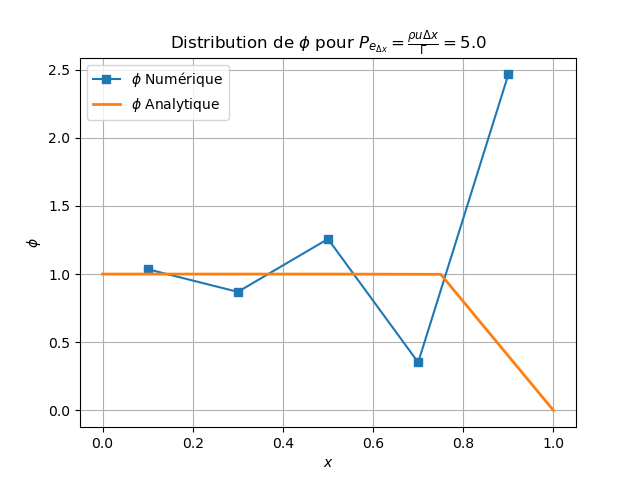

In [21]:
# Affichage de la solution
plt.figure()
plt.plot(x,phi,'-s',label=r'$\phi$ Numérique')
plt.plot(x_ana,phi_ana,linewidth=2, label=r'$\phi$ Analytique')
plt.title(r"Distribution de $\phi$ pour $P_{e_{\Delta x}}=\frac{\rho u \Delta x}{\Gamma}=$"+str(round(Pe,2)))
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.grid()
plt.show()

## Pourquoi la solution est non bornée ?

Dans le cas stationnaire sans source (ex. : convection-diffusion stationnaire), la forme discrète devient typiquement :

Garantir une solution **bornée** signifie que :

* Si les conditions aux limites sont dans un intervalle $[\phi_{\min}, \phi_{\max}]$
* Alors toutes les valeurs discrètes $\phi_i$ restent dans ce même intervalle

> C’est l’équivalent discret du **principe du maximum** : une solution sans source reste dans l’enveloppe fixée par les bords.

Une solution peut être **non bornée** si les coefficients de la matrice du système ne respectent pas certaines conditions.

Pour garantir que la solution du système $\mathbf{A} \boldsymbol{\phi} = \mathbf{b}$ reste **bornée**, il faut que :

* $A_{ii} > 0$ (diagonale positive)
* $A_{ij} \leq 0$ (coefficients hors diagonale **négatifs ou nuls**)
* $A_{ii} \geq \sum |A_{ij}|$  pour $i\neq j$ (dominance diagonale stricte)

Si ces conditions ne sont **pas** respectées :

* La solution peut **dépasser les bornes**
* Peut devenir **oscillante** (non monotone)
* Peut être **instable numériquement**


Supposons une cellule $i$ dont l'équation discrète est :

$$a_i \phi_i = a_{i+1} \phi_{i+1} + a_{i-1} \phi_{i-1}$$

On réécrit :

$$\phi_i = \frac{a_{i+1}}{a_i} \phi_{i+1} + \frac{a_{i-1}}{a_i} \phi_{i-1}$$

Supposons que $a_{i+1} > 0$ et $a_{i-1} < 0$ avec $a_i > 0$.

- $\frac{a_{i+1}}{a_i} >0$ 
- $\frac{a_{i-1}}{a_i} <0$

Donc, $\phi_i$ est une somme d’un multiple **positif** de $\phi_{i+1}$ et d’un multiple **négatif** de $\phi_{i-1}$.

**Conséquence :**
Si $\phi_{i-1}$ et $\phi_{i+1}$ sont tous deux $>0$, $\phi_i$ peut devenir **plus grand que les deux** ou même **$<0$** 

**Exemples avec $\phi_{i-1} = \phi_{i+1} = 1$:**

* Si $a_{i+1}/a_i = 5$ et $a_{i-1}/a_i = -2$

    Alors : 

    $$ \phi_i = 5 \times 1 + (-2) \times 1 = 3 $$

    $\phi_i = 3$ est plus grand que $\phi_{i+1}$ et $\phi_{i-1}$ qui valent tous deux 1.

* Si $a_{i+1}/a_i = 2$ et $a_{i-1}/a_i = -3$ :

    $$\phi_i = 2 \times 1 + (-3) \times 1 = -1 <0$$

    $\phi_i <0$ alors que $\phi_{i+1}$ et $\phi_{i-1}$ valent tous deux 1.

    **Conclusion :**  
    C’est pour cela qu’on exige que **tous les coefficients hors diagonale soient négatifs ou nuls** (et la diagonale positive) pour garantir une solution bornée.


In [30]:
def convection_diffusion_steady_display_matrix(L, N, phi_A, phi_B, rho, gamma, u):
    """
    Resoud un EDP de convection diffusion stationnaire 1D
    'L': longueur du domaine
    'N': nb de cellules
    'phi_A': condition limite gauche
    'phi_B': condition limite droite
    'rho': masse volumique
    'gamma': coefficient de diffusion
    'u': vitessee de convection
    """

    from sympy import Matrix, symbols, Eq, latex
    from IPython.display import display, Math

    # Maillage
    dx = L/float(N)                     # Pas d'espace
    x = np.linspace(dx/2, L-dx/2, N)    # Abscisses des centres des cellules

    # Initialisation
    phi = np.zeros(N)

    # Remplissage de la matrice A du système linéaire et du second membre B
    # A Phi = B
    
    a = np.zeros((N,N))
    b = np.zeros(N)

    # Condition aux limites à gauche : x=0-> phi(0) = phi_A
    a[0,0] = 3*gamma/dx + rho*u/2
    a[0,1] = - (gamma/dx - rho*u/2)
    b[0] = (2*gamma/dx + rho*u)*phi_A

    for i in range(1, N-1):
        a[i,i-1] = - (gamma/dx + rho*u/2)
        a[i,i] = 2*gamma/dx
        a[i,i+1] = - (gamma/dx - rho*u/2)
        b[i] = 0

    # Condition aux limites à droite : x=L-> phi(L) = phi_B
    a[N-1,N-2] = - (gamma/dx + rho*u/2) 
    a[N-1,N-1] = 3*gamma/dx - rho*u/2
    b[N-1] = (2*gamma/dx - rho*u)*phi_B 

    
    phi = np.linalg.solve(a,b)

    # Affichage du sytème d'équations linéaires  
    A = Matrix(a)
    B = Matrix(b)
    Phi = Matrix(phi)
    
    phi_syms = symbols('Phi0:%d' % (N))  # Crée (Phi1, Phi2, Phi3)
    Phi_syms = Matrix(N, 1, phi_syms)
    
    print("Le nb de Peclet local est : "+str(round(Pe,2)))

    display(Math(r"\textsf{Système d'équations linéaires : } A \cdot \Phi = B"))
    display(Math(r"A = " + latex(A)))
    display(Math(r"\Phi =" + latex(Phi_syms)))
    display(Math(r"B = " + latex(B)))
    #display(latex(A * Phi))
    #display(Eq(A * Phi_syms, B))
    display(Math(r"\textsf{La solution du système d'équations linéaires : } A \cdot \Phi = B \textsf{ est : }"))
    display(Math(r"\Phi = " + latex(Phi)))
    
    return

In [31]:
convection_diffusion_steady_display_matrix(L=1, N=3, phi_A=1, phi_B=0, rho=1, gamma=0.1, u=5)

Le nb de Peclet local est : 5.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Améliortaion du postraitement avec les `ipywidgets`

In [32]:
# Importation du module des widgets
from ipywidgets import *

def calcul_plot_sol(dx, u_conv):
    # Calcul du nombre de cellules N
    # correspondant au pas d'espace dx
    N = int(L/dx)

    # Calcul de la solution numérique et analytique en fonction des paramètres donnés
    x, phi = convection_diffusion_steady(L, N, phi_A, phi_B, rho, gamma, u_conv)
    x_ana, phi_ana = phi_analytique(L, 100, phi_A, phi_B, rho, gamma, u_conv)

    # Nombre de Peclet
    Pe = (rho*u_conv*dx)/(gamma)

    # Affichage des solutions numérique et analytique
    plt.figure()
    
    plt.plot(x,phi,'-s',label=r'$\phi$ Numérique')
    plt.plot(x_ana,phi_ana,linewidth=2, label=r'$\phi$ Analytique')

    plt.title(r"Distribution de $\phi$ pour $Pe=\frac{\rho u \Delta x}{\Gamma}=$"+str(round(Pe,2)))
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\phi$")
    
    plt.legend()
    plt.grid()
    plt.show()

# Définition des widgets (sliders)
dx = widgets.FloatSlider(value = 0.2,
                          min = 0.01, 
                          max = 0.5,
                          step = 0.01,
                          description = "Pas d'espace",
                          continuous_update = False)

u_conv = widgets.FloatSlider(value = 0.1,
                          min = 0.1, 
                          max = 5,
                          step = 0.1,
                          description = "u",
                          continuous_update = False)

# Affichage de la solution
interactive_plot = interact(calcul_plot_sol,
                           dx = dx,
                           u_conv = u_conv)

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description="Pas d'espace", max=0.5, min…

## Schéma d'interpolation upwind

Utilisons des schémas d'interpolation upwind pour garantir la stabilité du schéma numérique

In [33]:
def convection_diffusion_steady_upwind(L, N, phi_A, phi_B, rho, gamma, u):
    """
    Resoud un EDP de convection diffusion stationnaire 1D
    'L': longueur du domaine
    'N': nb de cellules
    'phi_A': condition limite gauche
    'phi_B': condition limite droite
    'rho': masse volumique
    'gamma': coefficient de diffusion
    'u': vitessee de convection
    """
    # Maillage
    dx = L/float(N)                     # Pas d'espace
    x = np.linspace(dx/2, L-dx/2, N)    # Abscisses des centres des cellules

    # Initialisation
    phi = np.zeros(N)

    # Remplissage de la matrice A du système linéaire et du second membre B
    # A Phi = B
    
    a = np.zeros((N,N))
    b = np.zeros(N)

    # Condition aux limites à gauche : x=0-> phi(0) = phi_A
    a[0,0] = 3*gamma/dx + rho*u
    a[0,1] = - (gamma/dx)
    b[0] = (2*gamma/dx + rho*u)*phi_A

    for i in range(1, N-1):
        a[i,i-1] = - (gamma/dx + rho*u)
        a[i,i] = (2*gamma/dx + rho*u)
        a[i,i+1] = - (gamma/dx)
        b[i] = 0

    # Condition aux limites à droite : x=L-> phi(L) = phi_B
    # a[N-1,N-2] = - (gamma/dx + rho*u) 
    # a[N-1,N-1] = 3*gamma/dx
    a[N-1,N-2] = - (gamma/dx) 
    a[N-1,N-1] = 3*gamma/dx  + rho*u
    b[N-1] = (2*gamma/dx - rho*u)*phi_B 

    phi = np.linalg.solve(a,b)
    
    return x, phi

In [34]:
# Calcul de la solution numérique
x_upwind, phi_upwind = convection_diffusion_steady_upwind(L, N, phi_A, phi_B, rho, gamma, u)
x, phi = convection_diffusion_steady(L, N, phi_A, phi_B, rho, gamma, u)

In [35]:
# Importation du module des widgets
from ipywidgets import *

def calcul_plot_sol(dx, u_conv):
    # Calcul du nombre de cellules N
    # correspondant au pas d'espace dx
    N = int(L/dx)

    # Calcul de la solution numérique et analytique en fonction des paramètres donnés
    x, phi = convection_diffusion_steady(L, N, phi_A, phi_B, rho, gamma, u_conv)
    x_upwind, phi_upwind = convection_diffusion_steady_upwind(L, N, phi_A, phi_B, rho, gamma, u_conv)
    x_ana, phi_ana = phi_analytique(L, 100, phi_A, phi_B, rho, gamma, u_conv)

    # Nombre de Peclet
    Pe = (rho*u_conv*dx)/(gamma)

    # Affichage des solutions numérique et analytique
    plt.figure()
    
    plt.plot(x,phi,'-s',label=r'$\phi$ Numérique')
    plt.plot(x_upwind,phi_upwind,'-o',label=r'$\phi$ Numérique Upwind')
    plt.plot(x_ana,phi_ana,linewidth=2, label=r'$\phi$ Analytique')

    plt.title(r"Distribution de $\phi$ pour $Pe=\frac{\rho u \Delta x}{\Gamma}=$"+str(round(Pe,2)))
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\phi$")

    plt.legend()
    plt.grid()

    plt.show()

# Définition des widgets (sliders)
dx = widgets.FloatSlider(value = 0.2,
                          min = 0.01, 
                          max = 0.5,
                          step = 0.01,
                          description = "Pas d'espace dx",
                          continuous_update = False)

u_conv = widgets.FloatSlider(value = 0.1,
                          min = 0.1, 
                          max = 5,
                          step = 0.1,
                          description = "u",
                          continuous_update = False)

# Affichage de la solution
interactive_plot = interact(calcul_plot_sol,
                           dx = dx,
                           u_conv = u_conv)

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description="Pas d'espace dx", max=0.5, …